This project is about exlonatory of data analysis and data science job in india. The company, job title and salary.

Data Science has become the most demanding job of the 21st century. Every organization is looking for candidates with knowledge of data science. In this tutorial, we are giving an introduction to data science, with data science Job roles, tools for data science, components of data science and application

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.options.mode.chained_assignment = None # default='warn'

## Loading dataset

In [132]:
salary_data = pd.read_csv('Salary Dataset.csv')
print(salary_data)
#df = pd.read_csv("/kaggle/input/analytics-industry-salaries-2022-india/Salary Dataset.csv")
#print ("Dataset Shape: ", df.shape, "\n--------------------------------")

#df.head()

                   Company Name                             Job Title  \
0                      Mu Sigma                        Data Scientist   
1                           IBM                        Data Scientist   
2     Tata Consultancy Services                        Data Scientist   
3              Impact Analytics                        Data Scientist   
4                     Accenture                        Data Scientist   
...                         ...                                   ...   
4339                    TaiyōAI            Machine Learning Scientist   
4340    Decimal Point Analytics            Machine Learning Developer   
4341                     MyWays            Machine Learning Developer   
4342  Market Pulse Technologies  Software Engineer - Machine Learning   
4343                    vPhrase             Machine Learning Engineer   

      Salaries Reported   Location         Salary  
0                 105.0  Bangalore   ₹6,48,573/yr  
1                  

## **Data Exploratory Analysis**

In [133]:
salary_data = salary_data.rename(columns = {'Company Name' : 'company_name', 'Job Title' : 'job_title', 
                           'Salaries Reported' : 'sal_reported', 'Location' : 'location', 
                           'Salary' : 'salary'} )
salary_data.columns

Index(['company_name', 'job_title', 'sal_reported', 'location', 'salary'], dtype='object')

In [134]:
salary_data.head()

,company_name,job_title,sal_reported,location,salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [136]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  4341 non-null   object 
 1   job_title     4344 non-null   object 
 2   sal_reported  4342 non-null   float64
 3   location      4344 non-null   object 
 4   salary        4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [137]:
salary_data[salary_data['salary'].str.contains('\$')].head()

,company_name,job_title,sal_reported,location,salary
415,ICICI Bank,Data Scientist,1.0,Bangalore,"$2,24,948/yr"
658,Infosys,Data Scientist,1.0,Bangalore,"$5,11,613/yr"
1096,Schlumberger,Data Scientist,1.0,Pune,"$53,527/yr"
1846,IBM,Data Scientist,1.0,Mumbai,"$2,05,476/yr"
1857,ABC,Data Scientist,1.0,Mumbai,"$96,739/yr"


### Let us Clean our data

In [138]:
salary_data['currency'] = salary_data['salary'].str.slice(start=0, stop=1)
salary_data['duration'] = salary_data['salary'].str.split("/", expand=True)[1]
salary_data['sal'] = salary_data['salary'].str.split("/", expand=True)[0].str.slice(start = 1).str.replace(',', '')
salary_data.head()

,company_name,job_title,sal_reported,location,salary,currency,duration,sal
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110


In [139]:
salary_data[salary_data["currency"] == 'A']

,company_name,job_title,sal_reported,location,salary,currency,duration,sal
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",A,yr,FN 156179


In [140]:
salary_data['currency'] = salary_data['currency'].str.replace('A', 'AFN')
salary_data['sal'] = salary_data['sal'].str.replace('FN', '').str.strip()
salary_data[salary_data["currency"].str.contains('A')]

,company_name,job_title,sal_reported,location,salary,currency,duration,sal
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN,yr,156179


In [141]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  4341 non-null   object 
 1   job_title     4344 non-null   object 
 2   sal_reported  4342 non-null   float64
 3   location      4344 non-null   object 
 4   salary        4344 non-null   object 
 5   currency      4344 non-null   object 
 6   duration      4344 non-null   object 
 7   sal           4344 non-null   object 
dtypes: float64(1), object(7)
memory usage: 271.6+ KB


In [142]:
salary_data['sal'] = salary_data['sal'].astype('float64')
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  4341 non-null   object 
 1   job_title     4344 non-null   object 
 2   sal_reported  4342 non-null   float64
 3   location      4344 non-null   object 
 4   salary        4344 non-null   object 
 5   currency      4344 non-null   object 
 6   duration      4344 non-null   object 
 7   sal           4344 non-null   float64
dtypes: float64(2), object(6)
memory usage: 271.6+ KB


In [143]:
salary_data.isna().sum()

company_name    3
job_title       0
sal_reported    2
location        0
salary          0
currency        0
duration        0
sal             0
dtype: int64

### Let us convert all currencies to USD

In [144]:
conver_cur = {'₹':0.013, '$':1, '£':1.36, 'AFN':0.011}
conver_cur

{'₹': 0.013, '$': 1, '£': 1.36, 'AFN': 0.011}

In [145]:
salary_data['salary_usd'] = 0 

for key, value in conver_cur.items():
    for x, xRow in salary_data.iterrows():
        if(key in xRow['currency'] ):
            salVal = xRow['sal']
            salVal = round(int(salVal) * value, 2)
            #print(x, " --- ", xRow['sal'], " ---> ",salVal, " --->", key)
            salary_data.at[x, "salary_usd"] = salVal
salary_data

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0,8431
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0,15495
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0,10879
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0,8704
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0,12273
...,...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,mo,5180.0,67
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,yr,751286.0,9766
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,yr,410952.0,5342
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,yr,1612324.0,20960


#### Converting all salary mode to per year

In [146]:
salary_data['duration'].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [147]:
convert_to_year = {'yr':1, 'mo':12, 'hr':2064}
convert_to_year

{'yr': 1, 'mo': 12, 'hr': 2064}

In [148]:
salary_data[salary_data.index == 3876]

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd
3876,Turing.com,Machine Learning Engineer,1.0,Bangalore,$62/hr,$,hr,62.0,62


In [150]:
salary_data['$/yr'] = 0 

for key, value in convert_to_year.items():
    salary_data['salary_usd_yearly'] =salary_data.apply(lambda row: (row['salary_usd'] * value
                                                      if row['duration'] == key 
                                                      else row['$/yr']*1), axis=1)
salary_data.head()

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd,$/yr,salary_usd_yearly
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0,8431,0,0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0,15495,0,0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0,10879,0,0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0,8704,0,0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0,12273,0,0


In [151]:
salary_data[salary_data['salary_usd_yearly'] == 0]

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd,$/yr,salary_usd_yearly
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0,8431,0,0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0,15495,0,0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0,10879,0,0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0,8704,0,0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0,12273,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,mo,5180.0,67,0,0
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,yr,751286.0,9766,0,0
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,yr,410952.0,5342,0,0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,yr,1612324.0,20960,0,0


#### Check the number of Locations

In [152]:
salary_data['location'].value_counts()

Bangalore    1584
Pune          818
Hyderabad     669
New Delhi     656
Mumbai        617
Name: location, dtype: int64

### Check number of each job title

In [153]:
salary_data['job_title'].value_counts()

Data Scientist                              1844
Data Analyst                                 990
Data Engineer                                805
Machine Learning Engineer                    568
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Machine Learning Scientist                     2
Machine Learning Data Associate II             2
Machine Learning Developer                     2
Software Engineer - Machine Learning           2
Machine Learning Consultant                    2
Associate Machine Learning Engineer            1
Data Scientist - Trainee                       1
Machine Learning Associate                     1
Machine Learning Data Associate                1
Data Science Manager                           1
Data Science Associate                         1
Machine Learning Dat

In [154]:
salary_data[salary_data['job_title'].str.contains('Associate')]

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd,$/yr,salary_usd_yearly
1253,ZS Associates,Data Science Associate,9.0,Pune,"₹12,03,913/yr",₹,yr,1203913.0,15650,0,0
4115,Amazon,Machine Learning Data Associate,38.0,Hyderabad,"₹2,75,841/yr",₹,yr,275841.0,3585,0,0
4116,Amazon,Machine Learning Data Associate I,9.0,Hyderabad,"₹2,58,596/yr",₹,yr,258596.0,3361,0,0
4117,Amazon,Machine Learning Associate,6.0,Hyderabad,"₹2,95,114/yr",₹,yr,295114.0,3836,0,0
4118,Amazon,Machine Learning Data Associate II,5.0,Hyderabad,"₹3,83,213/yr",₹,yr,383213.0,4981,0,0
4120,Techolution,Associate Machine Learning Engineer,3.0,Hyderabad,"₹4,64,372/yr",₹,yr,464372.0,6036,0,0
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr",₹,yr,329439.0,4282,0,0


In [155]:
salary_data["level"] = 'Associate'
level_list = {'Consultant', 'Manager', 'Senior', 'Junior', 'Trainee'}
for x in level_list:
    salary_data['level'].loc[salary_data['job_title'].str.contains(x)] = x
    
salary_data.head()

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd,$/yr,salary_usd_yearly,level
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0,8431,0,0,Associate
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0,15495,0,0,Associate
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0,10879,0,0,Associate
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0,8704,0,0,Associate
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0,12273,0,0,Associate


In [156]:
salary_data.shape

(4344, 12)

#### Drop missing number

In [157]:
salary_data.dropna(inplace=True)
salary_data.shape

(4339, 12)

#### Let's check the top countries

In [158]:
salary_data['company_name'].value_counts().head(20)

Tata Consultancy Services         41
Amazon                            31
Accenture                         30
Google                            27
Fresher                           26
IBM                               26
First Student                     25
Infosys                           23
Cognizant Technology Solutions    21
DONE by NONE                      21
ABC                               20
Wipro                             17
Capgemini                         17
Microsoft                         17
Deloitte                          16
LTI                               16
Tech Mahindra                     16
Nones                             15
HCL Technologies                  14
Quantiphi                         14
Name: company_name, dtype: int64

In [159]:
salary_data['company_name'].value_counts()

Tata Consultancy Services               41
Amazon                                  31
Accenture                               30
Google                                  27
Fresher                                 26
                                        ..
SRI International                        1
ROHIT KUMAR MODI                         1
IDC (International Data Corporation)     1
myPaisaa                                 1
Knowledge Lens                           1
Name: company_name, Length: 2528, dtype: int64

#### Let us Extract some companies 

In [160]:
df_companies = salary_data[~salary_data.company_name.str.contains('Unknown')]
df_companies

,company_name,job_title,sal_reported,location,salary,currency,duration,sal,salary_usd,$/yr,salary_usd_yearly,level
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0,8431,0,0,Associate
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0,15495,0,0,Associate
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0,10879,0,0,Associate
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0,8704,0,0,Associate
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0,12273,0,0,Associate
...,...,...,...,...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,mo,5180.0,67,0,0,Associate
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,yr,751286.0,9766,0,0,Associate
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,yr,410952.0,5342,0,0,Associate
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,yr,1612324.0,20960,0,0,Associate


# Let us Visualize some of our dataset

In [161]:
df_companies.groupby(['company_name'])['salary_usd'].sum()

company_name
& Other Stories     9389
---                  130
159 Solutions      10774
1mg                12888
20K Group            838
                   ...  
vPhrase            30888
vitrana            13000
wayForward         10987
yellow.ai          15268
Águas Guariroba      722
Name: salary_usd, Length: 2527, dtype: int64

In [162]:
df_companies['level'].value_counts()

Associate     4267
Senior          48
Junior          18
Consultant       3
Trainee          1
Manager          1
Name: level, dtype: int64

#### Let us see Job Frequency in Different Locations

Text(0, 0.5, 'Numbers')

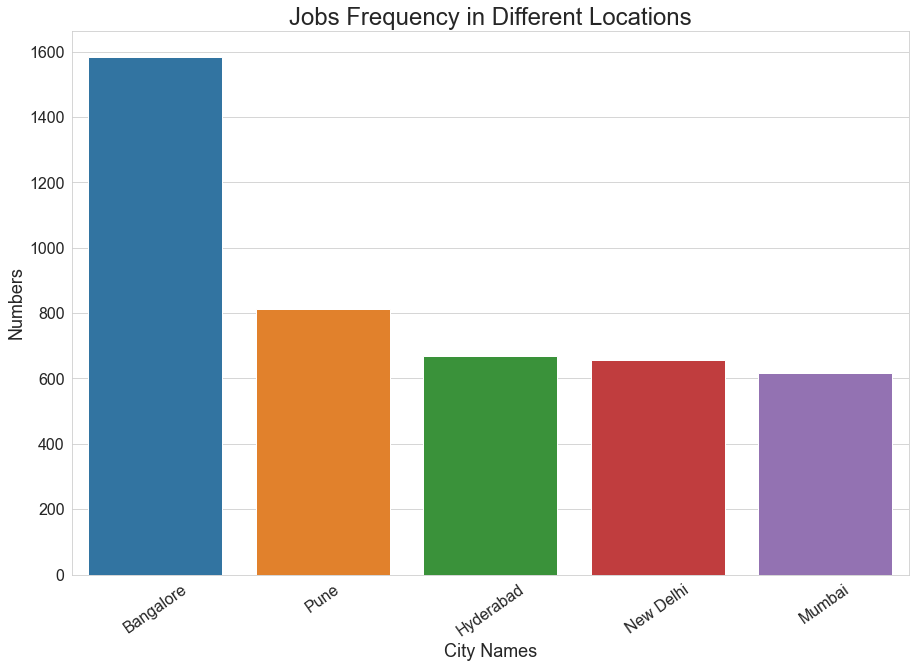

In [163]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,10))
sns.countplot(x="location", data=salary_data)
plt.xticks(rotation=35, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.title("Jobs Frequency in Different Locations", fontsize = 24)
plt.xlabel("City Names", fontsize = 18)
plt.ylabel("Numbers", fontsize = 18)

Text(0, 0.5, 'Frequecy')

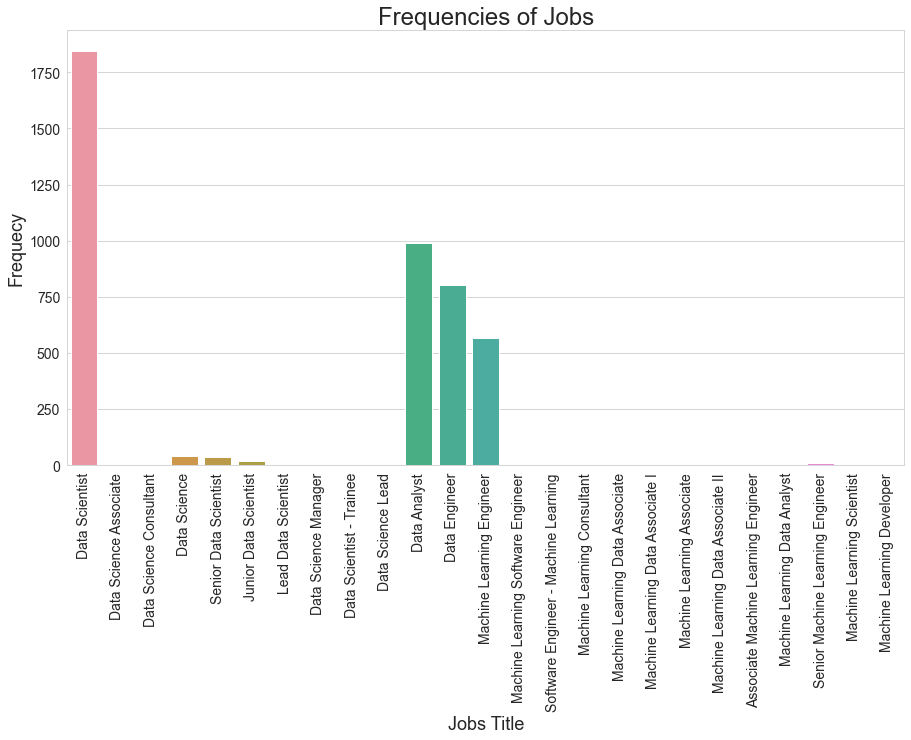

In [164]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,8))

sns.countplot(x="job_title", data=salary_data)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.title("Frequencies of Jobs", fontsize = 24)
plt.xlabel("Jobs Title", fontsize = 18)
plt.ylabel("Frequecy", fontsize = 18)

### Job Category 

Text(0, 0.5, 'Frequency')

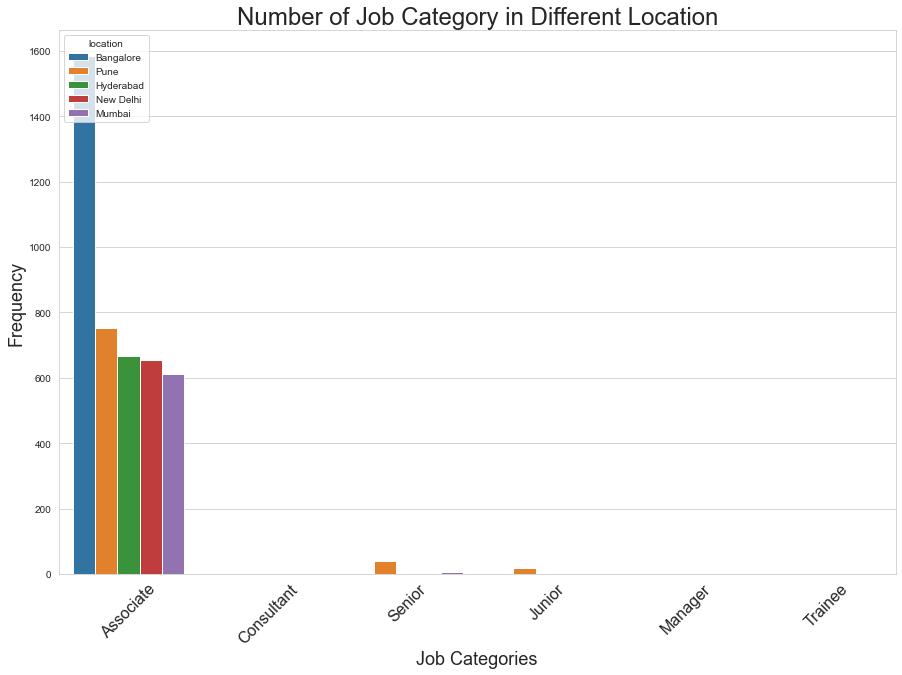

In [165]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,10))
sns.countplot(x="level", data=salary_data, hue="location")
plt.title("Number of Job Category in Different Location", fontsize = 24)
plt.xticks(rotation=45, fontsize=16)
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)

### Average Salary by Job Level

Text(0, 0.5, 'Salary')

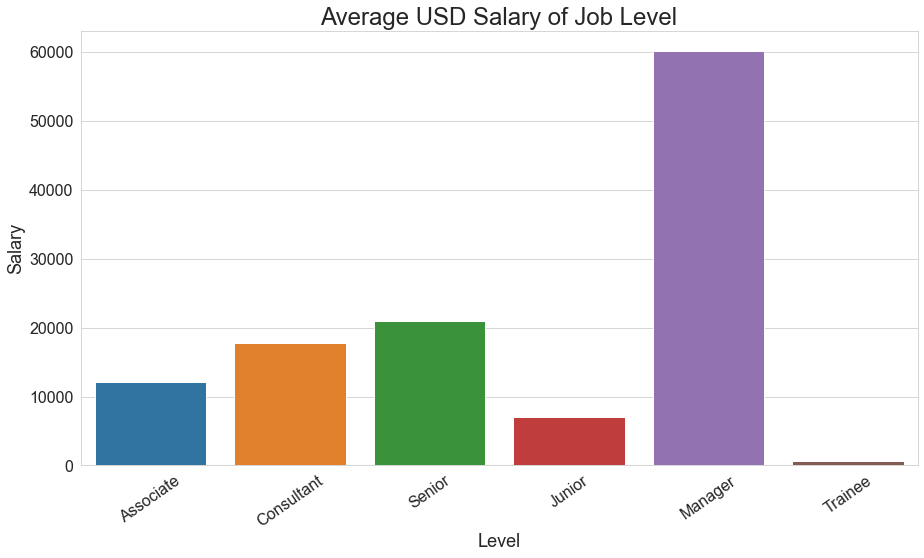

In [166]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,8))
ax = sns.barplot(x="level", y="salary_usd", data=salary_data, ci=None)


plt.xticks(rotation=35, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.title("Average USD Salary of Job Level", fontsize = 24)
plt.xlabel("Level", fontsize = 18)
plt.ylabel("Salary", fontsize = 18)

# Conclusion

The conclusion from our exploratory of data professional jobs in India 

1. Bangalore have highest number of jobs while mumbai have the lowest
2. Data scientist is most title of jobs in this exploratory followed by data analyst and data engineer
3. Bangalore has the highest number of categories i.e Associate
4. Manager earn much money in the level of the job in all locations 